Decision Tree Accuracy: 0.7291666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.43      0.49        44
           1       0.77      0.86      0.82       100

    accuracy                           0.73       144
   macro avg       0.68      0.65      0.65       144
weighted avg       0.71      0.73      0.72       144



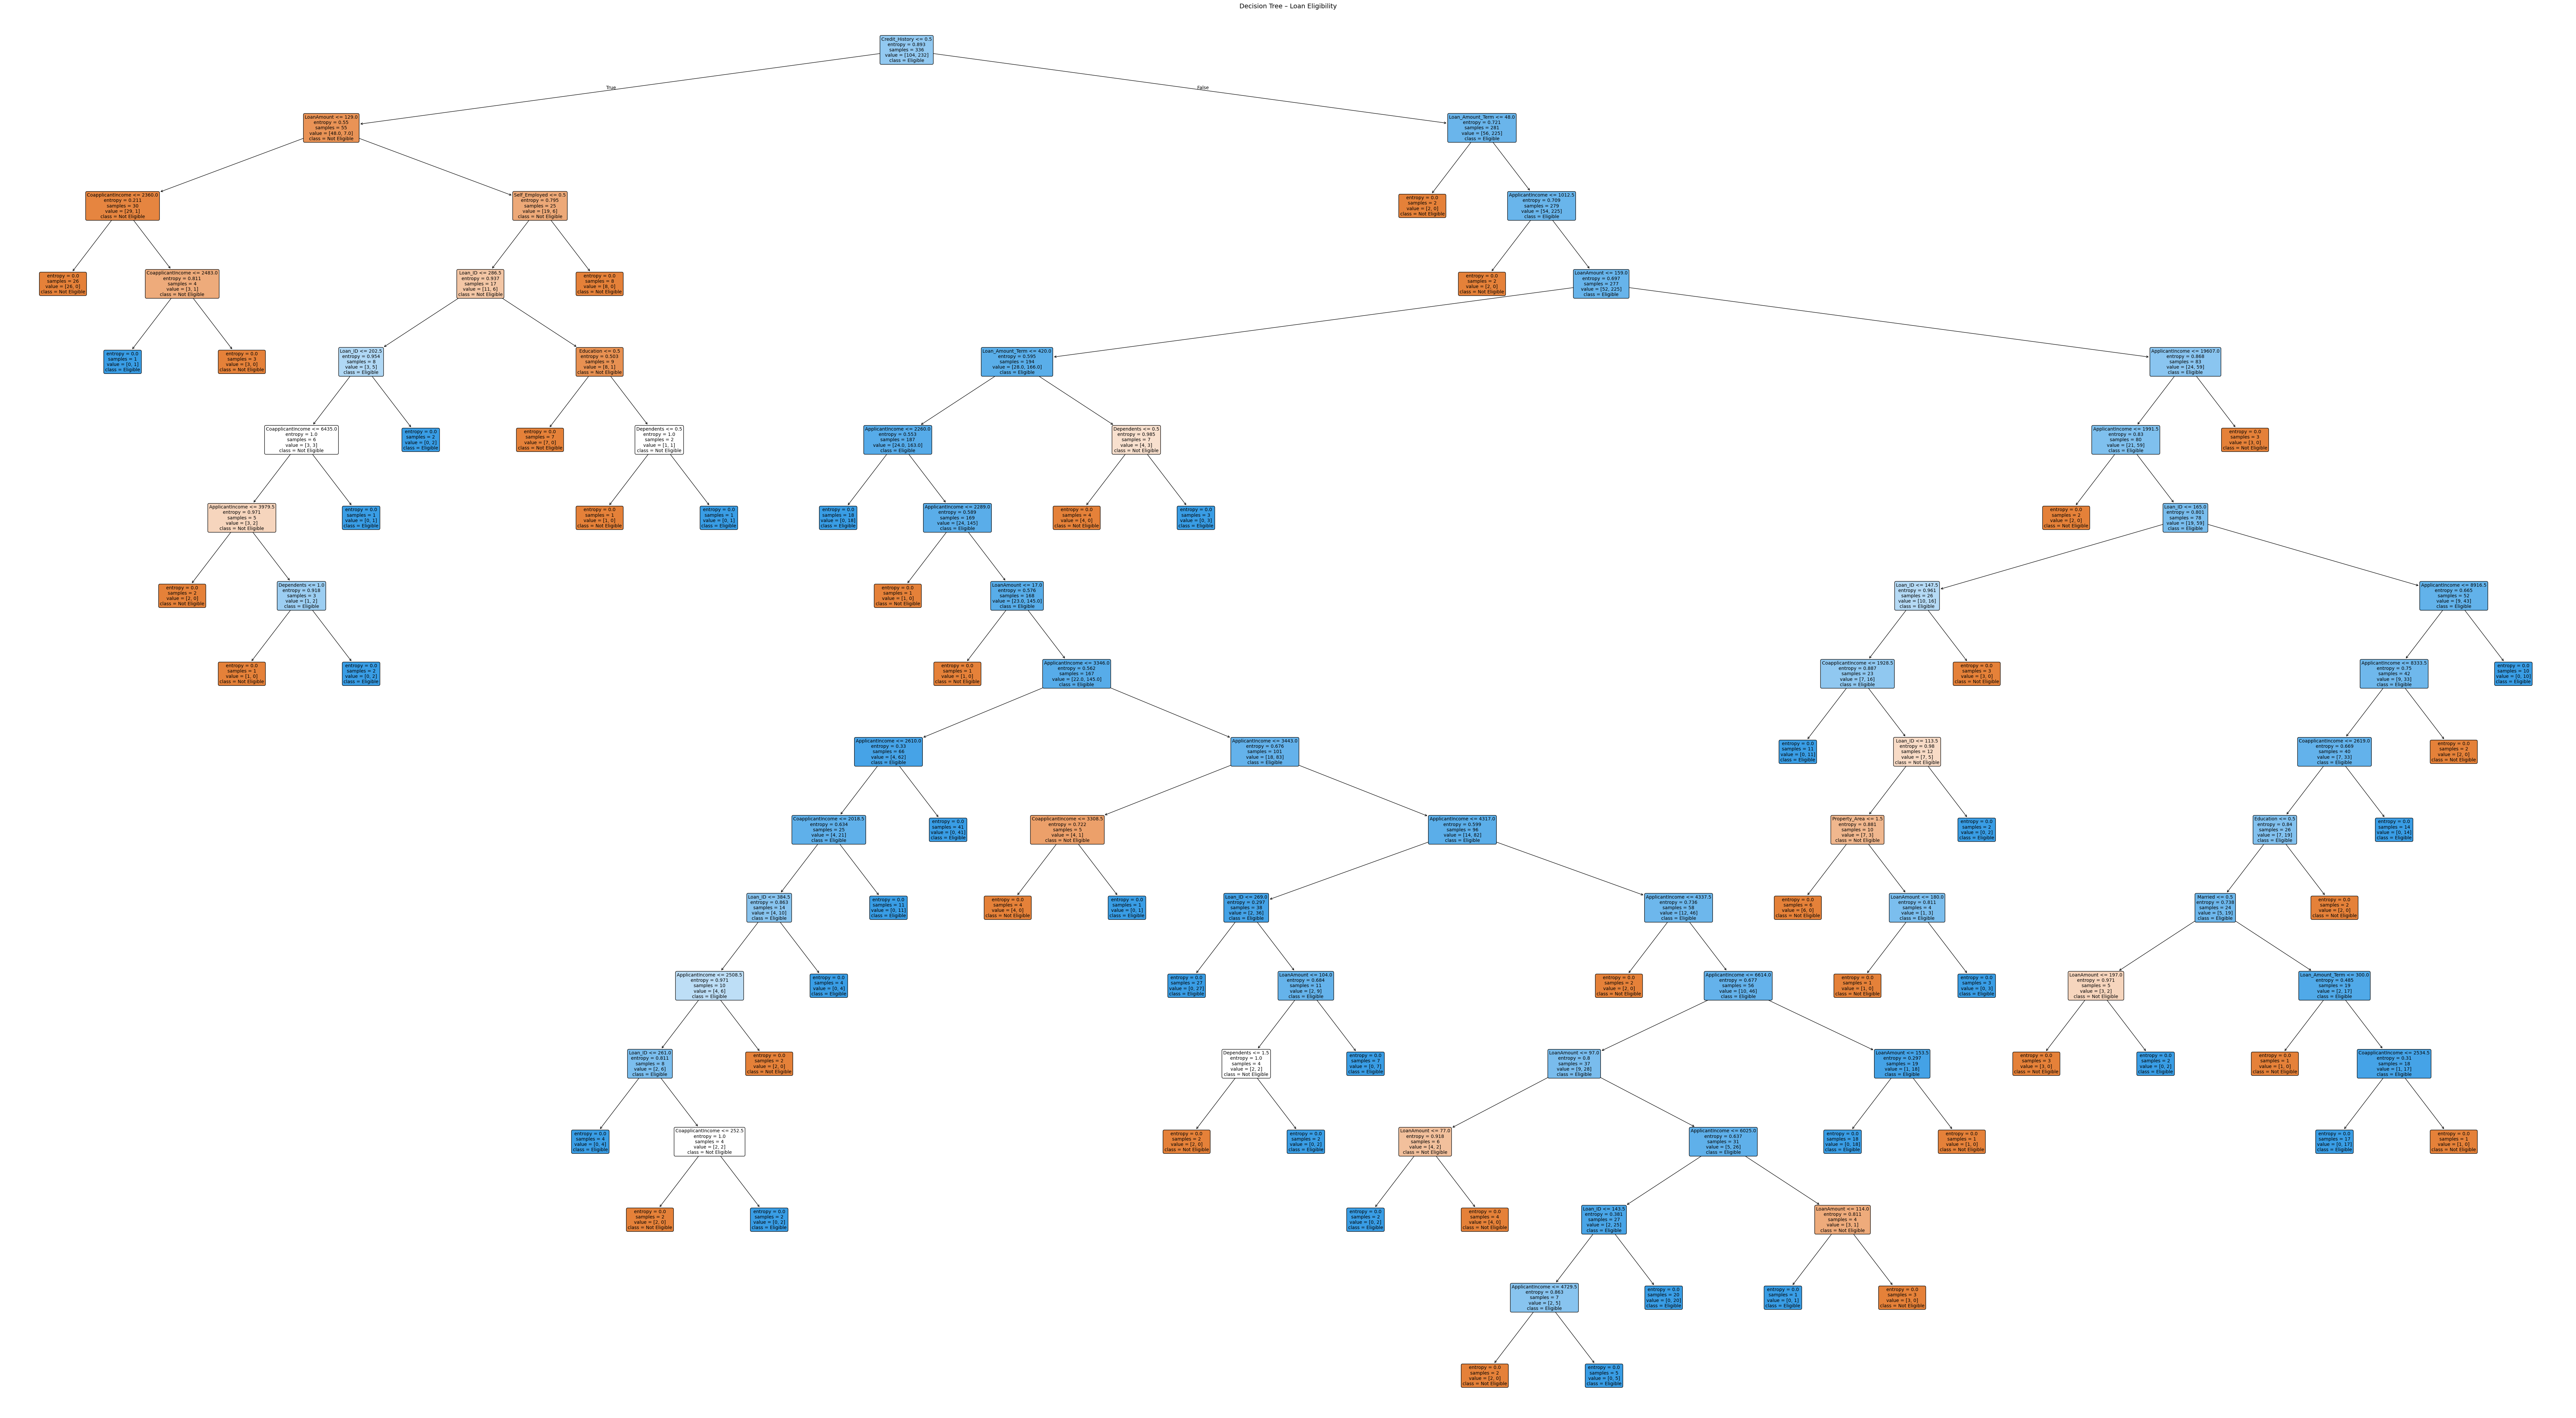

In [1]:
# Decision Tree Classification – Loan Eligibility (madfhantr.csv)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("madfhantr.csv")

# Drop rows with missing values
df = df.dropna()

# Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Decision Tree Model
model = DecisionTreeClassifier(criterion="entropy", random_state=22)
model.fit(X_train, y_train)

# Predictions & Accuracy
y_pred = model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(100, 55))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Not Eligible", "Eligible"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree – Loan Eligibility", fontsize=14)
plt.show()
